### Multiple Linear Regression

''''
Single Linear Regression
Y = a + b + x

Multiple Linear Regression
Y = B0 + B1 + X


In [5]:
# import neccessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [20]:
# read dataset
data = pd.read_csv("C:\Real-estate1.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [36]:
# MORE EDA (EXPLORATORY DATA ANALYSIS) CAN BE DONE FROM HERE

In [21]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [24]:
data.shape

(414, 8)

In [25]:
# drop the No column
data.drop("No", inplace=True, axis=1)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [26]:
data.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [27]:
X = data.drop("Y house price of unit area", axis=1)
y = data["Y house price of unit area"]

In [28]:
print(f"X attribute => {y}")

X attribute => 0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


In [29]:
# split the dat into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [30]:
# instantiate model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model

LinearRegression()

In [31]:
print(f"training X samples =>{X_test.shape}")
print(f"training y samples =>{y_test.shape}")

training X samples =>(83, 6)
training y samples =>(83,)


In [32]:
print(f"training X samples =>{X_train.shape}")
print(f"training y samples =>{y_train.shape}")

training X samples =>(331, 6)
training y samples =>(331,)


In [34]:
# train the model 
lr_model.fit(X_train, y_train)

LinearRegression()

In [42]:
# making prediction on unseen data
model_predictions = lr_model.predict(X_test)

In [43]:
# evaluate model to know perfomance
mse = mean_squared_error(y_test, model_predictions)
mae = mean_absolute_error(y_test, model_predictions)

In [44]:
print(f"model MSE => {round(mse, 2)}")
print(f"model MAE => {round(mae, 2)}")

model MSE => 53.51
model MAE => 5.31


In [52]:
test_data pd.read_csv("C:\Users\user\Desktop\Real-estate1.csv", encoding="unicode_escape")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (153001164.py, line 1)

In [53]:
model_prediction.shape

(83,)

C:\Users\user\AppData\Local\Temp\ipykernel_8904\122584790.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'k--',lw=2, color='black', label='Acurate predictions')


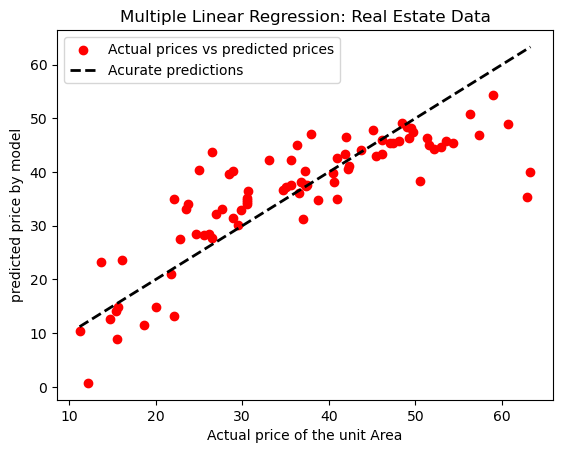

In [63]:
plt.scatter(y_test, model_prediction, color= 'red',label='Actual prices vs predicted prices')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'k--',lw=2, color='black', label='Acurate predictions')
plt.xlabel('Actual price of the unit Area')
plt.ylabel('predicted price by model')
plt.title('Multiple Linear Regression: Real Estate Data')
plt.legend()
plt.show()

In [56]:
data.tail()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [59]:
data.info

<bound method DataFrame.info of      X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                    

### SVM SVR


In [4]:
# workiing with built- in dataset

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [6]:
# convert to df
data = pd.Dataframe(data=np.c_[house_data['data'],
                              house_data["target"]],
                             columns=housedata["featurename"]
                    +["target"])

NameError: name 'pd' is not defined